## Basic Notebook for Opening and Visualizing the Datasets

Created by Aline Nascimento

PhD Candidate in Applied Computing — National Institute for Space Research (INPE), Brazil

alinephysics@gmail.com | aline.andrade@inpe.br

## Libraries and functions

In [100]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [101]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
def return_dataset_analysis(ds, var_name):
    print(ds)  # Structure and variables

    # ---- 2. Select NEE Variable ----
    nee = ds[var_name] 

    # ---- 3. Quick Statistics ----
    print("\nBasic Statistics for NEE:")
    print(f"Mean: {nee.mean().item():.4f}")
    print(f"Min: {nee.min().item():.4f}")
    print(f"Max: {nee.max().item():.4f}")
    print(f"Std Dev: {nee.std().item():.4f}")

    # ---- 4. Missing Data Check ----
    missing = nee.isnull().sum().item()
    total = nee.size
    print(f"\nMissing values: {missing} ({(missing/total)*100:.2f}%)")

    # ---- 5. Time Series Plot ----
    plt.figure(figsize=(12,4))
    nee_plot = nee.squeeze() 
    nee_plot.plot.line('b-', label=var_name)

    plt.title(f"Time Series of NEE ({var_name})")
    plt.ylabel('NEE')
    plt.grid()
    plt.show()

    # ---- 6. Time Axis Inspection ----
    print("\nTime coverage:")
    print(f"Start: {str(ds['time'].min().values)}")
    print(f"End:   {str(ds['time'].max().values)}")
    print(f"Total time steps: {ds['time'].size}")


# Net Ecosystem Exchange Towers Flux in Brazilian Amazon 

###  -  LBA - Large Biosphere-Atmosphere Experiment
Guide: https://daac.ornl.gov/LBA/guides/CD32_Fluxes_Brazil.html

Site: Manaus km 34 (K34)  
&nbsp;&nbsp;&nbsp;&nbsp;State of Amazonas, Manaus – km 34 primary forest site  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -60.209297 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -02.609097 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 130.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 50.0000 m  

Site: Santarém km 67 (K67)  
&nbsp;&nbsp;&nbsp;&nbsp;State of Pará, Santarem, BR-163 highway km67 primary forest site  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -54.958889 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -02.856667 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 130.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 63.0000 m  

Site: Santarém km 77 (K77)  
&nbsp;&nbsp;&nbsp;&nbsp;State of Pará, Santarem, BR-163 highway km77 pasture-agriculture site  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -54.536520 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -03.011896 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 130.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 18.0000 m  

Site: Santarém km 83 (K83)  
&nbsp;&nbsp;&nbsp;&nbsp;State of Pará, Santarem, BR-163 highway km 83 selectively logged primary forest  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -54.971435 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -03.018029 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 130.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 64.0000 m  

Site: Caxiuana (CAX)  
&nbsp;&nbsp;&nbsp;&nbsp;State of Pará, Caxiuana forest  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -51.4589833 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -1.719719444 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 130.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 51.5000 m  

Site: Reserva Jarú (RJA)  
&nbsp;&nbsp;&nbsp;&nbsp;Rondônia State, Reserva Jaru, tropical dry forest  
&nbsp;&nbsp;&nbsp;&nbsp;Longitude: -61.930903 Degrees East Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Latitude: -10.083194 Degrees North Decimal  
&nbsp;&nbsp;&nbsp;&nbsp;Altitude: 191.000 m  
&nbsp;&nbsp;&nbsp;&nbsp;Measurement Height: 60.0000 m  


### - Fluxnet

BrSa1 Tower: https://fluxnet.org/data/fluxnet2015-dataset/

The BR-Sa1 flux tower (also referred to as K67 within the LBA initiative) is part of the FluxNet network. Although both names refer to the same physical site, differences may arise due to specific corrections, standardization procedures, and distinct data processing workflows adopted by each initiative. Notably, the K67 dataset generally contains fewer data records compared to BR-Sa1, as a result of differences in data availability and processing between the LBA and FluxNet initiatives. Data from the LBA (Large-Scale Biosphere-Atmosphere Experiment in Amazonia) initiative serves as the primary source for FluxNet sites in Brazil.

### LBA K67 Site Data

In [103]:
# LBA K67 Site Data

k67_tower = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/LBA_K67_2001_2006.nc') # Specify the correct path to your NetCDF dataset here
k67_tower

<xarray.Dataset> Size: 58kB
Dimensions:                 (latitude: 1, longitude: 1, time: 1462)
Coordinates:
  * latitude                (latitude) float64 8B -2.86
  * longitude               (longitude) float64 8B -54.96
  * time                    (time) datetime64[ns] 12kB 2001-12-31 ... 2005-12-31
Data variables:
    NEEnogap_5day_sco2_ust  (latitude, longitude, time) float64 12kB ...
    Fc                      (latitude, longitude, time) float64 12kB ...
    ta                      (latitude, longitude, time) float64 12kB ...
    VPD                     (latitude, longitude, time) float64 12kB ...

k67 tower
<xarray.Dataset> Size: 58kB
Dimensions:                 (latitude: 1, longitude: 1, time: 1462)
Coordinates:
  * latitude                (latitude) float64 8B -2.86
  * longitude               (longitude) float64 8B -54.96
  * time                    (time) datetime64[ns] 12kB 2001-12-31 ... 2005-12-31
Data variables:
    NEEnogap_5day_sco2_ust  (latitude, longitude, time) float64 12kB ...
    Fc                      (latitude, longitude, time) float64 12kB ...
    ta                      (latitude, longitude, time) float64 12kB ...
    VPD                     (latitude, longitude, time) float64 12kB ...

Basic Statistics for NEE:
Mean: -0.0322
Min: -4.1545
Max: 4.1294
Std Dev: 1.2401

Missing values: 5 (0.34%)


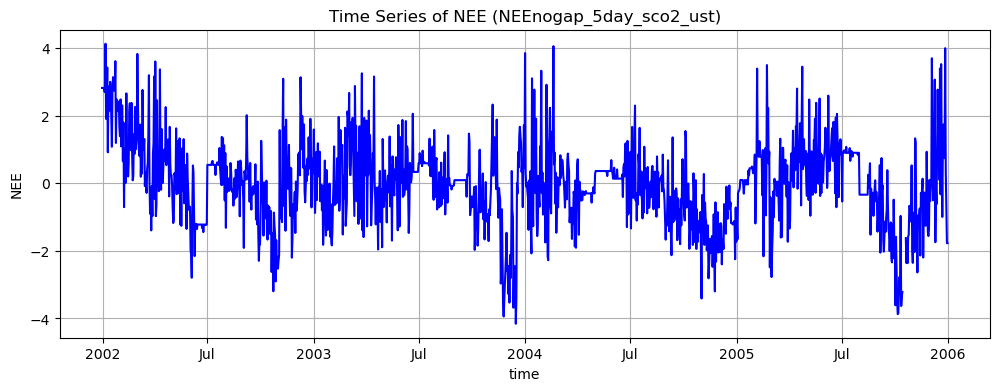


Time coverage:
Start: 2001-12-31T00:00:00.000000000
End:   2005-12-31T00:00:00.000000000
Total time steps: 1462


In [104]:
print("k67 tower")
return_dataset_analysis(k67_tower, 'NEEnogap_5day_sco2_ust')

In [105]:
# LBA K34 Site Data
k34_tower = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/LBA_K34_1998_2006.nc')
k34_tower

<xarray.Dataset> Size: 117kB
Dimensions:                 (latitude: 1, longitude: 1, time: 2923)
Coordinates:
  * latitude                (latitude) float64 8B -2.61
  * longitude               (longitude) float64 8B -60.21
  * time                    (time) datetime64[ns] 23kB 1998-12-31 ... 2006-12-31
Data variables:
    NEEnogap_5day_sco2_ust  (latitude, longitude, time) float64 23kB ...
    Fc                      (latitude, longitude, time) float64 23kB ...
    ta                      (latitude, longitude, time) float64 23kB ...
    VPD                     (latitude, longitude, time) float64 23kB ...

k34 tower
<xarray.Dataset> Size: 117kB
Dimensions:                 (latitude: 1, longitude: 1, time: 2923)
Coordinates:
  * latitude                (latitude) float64 8B -2.61
  * longitude               (longitude) float64 8B -60.21
  * time                    (time) datetime64[ns] 23kB 1998-12-31 ... 2006-12-31
Data variables:
    NEEnogap_5day_sco2_ust  (latitude, longitude, time) float64 23kB ...
    Fc                      (latitude, longitude, time) float64 23kB ...
    ta                      (latitude, longitude, time) float64 23kB ...
    VPD                     (latitude, longitude, time) float64 23kB ...

Basic Statistics for NEE:
Mean: -1.4574
Min: -3.8531
Max: 0.9021
Std Dev: 0.6233

Missing values: 5 (0.17%)


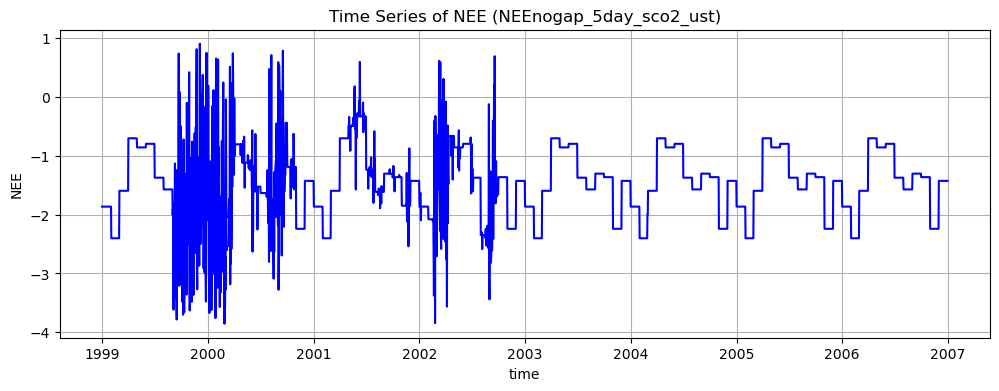


Time coverage:
Start: 1998-12-31T00:00:00.000000000
End:   2006-12-31T00:00:00.000000000
Total time steps: 2923


In [106]:
print("k34 tower")
return_dataset_analysis(k34_tower, 'NEEnogap_5day_sco2_ust') # this data has a lot of mean annual cycle

In [107]:
#Fluxnet BRSa1 Site Data3
brsa1_tower = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/FLUXNET_BR-Sa1_2002_2011.nc')
brsa1_tower

<xarray.Dataset> Size: 88kB
Dimensions:      (time: 3652, latitude: 1, longitude: 1)
Coordinates:
  * time         (time) datetime64[ns] 29kB 2002-01-01 2002-01-02 ... 2011-12-31
  * latitude     (latitude) float64 8B -2.86
  * longitude    (longitude) float64 8B -54.96
Data variables:
    NEE_VUT_REF  (latitude, longitude, time) float64 29kB ...
    NEE_CUT_REF  (latitude, longitude, time) float64 29kB ...

brsa1 tower

<xarray.Dataset> Size: 88kB
Dimensions:      (time: 3652, latitude: 1, longitude: 1)
Coordinates:
  * time         (time) datetime64[ns] 29kB 2002-01-01 2002-01-02 ... 2011-12-31
  * latitude     (latitude) float64 8B -2.86
  * longitude    (longitude) float64 8B -54.96
Data variables:
    NEE_VUT_REF  (latitude, longitude, time) float64 29kB ...
    NEE_CUT_REF  (latitude, longitude, time) float64 29kB ...

Basic Statistics for NEE:
Mean: -0.1570
Min: -6.5277
Max: 7.3209
Std Dev: 1.5403

Missing values: 365 (9.99%)


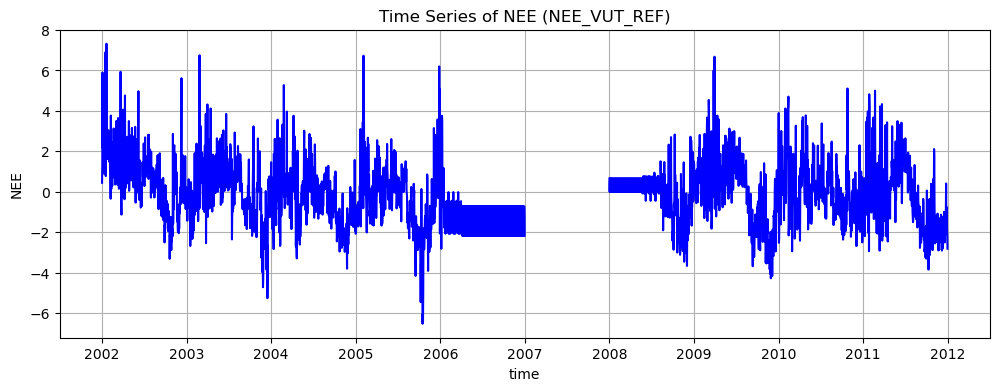


Time coverage:
Start: 2002-01-01T00:00:00.000000000
End:   2011-12-31T00:00:00.000000000
Total time steps: 3652


In [108]:
print("brsa1 tower\n")
return_dataset_analysis(brsa1_tower, "NEE_VUT_REF")

# Fluxcom Data

Link Source: https://www.fluxcom.org/

In [109]:
# FluxCom estimate for the BR-Sa1 flux tower (also referred to as K67 within the LBA initiative), part of the FluxNet network.
brsa1_fluxcom_data = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/Fluxcom_Data_WFDEI_K67_tower_Tapajos_Forest_daily_1980-2013.nc')
brsa1_fluxcom_data

<xarray.Dataset> Size: 149kB
Dimensions:  (time: 12419)
Coordinates:
  * time     (time) datetime64[ns] 99kB 1980-01-01 1980-01-02 ... 2012-12-31
    lon      float64 8B ...
    lat      float64 8B ...
Data variables:
    NEE      (time) float32 50kB ...
Attributes:
    title:                NEE based on FLUXCOM RS+METEO with CRUNCEPv6 climate 
    version:              v1
    forcing:              CRUNCEPv6
    method:               Random Forest
    flux:                 NEE
    temporal_resolution:  daily
    reference:            Jung et al. 2016, Nature; Tramontana et al. 2016, B...
    institution:          MPI-BGC-BGI
    provided_by:          Martin Jung [mjung@bgc-jena.mpg.de] on behalf of FL...
    created_by:           Fabian Gans [fgans@bgc-jena.mpg.de], Ulrich Weber [...

BRSA1 Fluxcom Estimation

<xarray.Dataset> Size: 149kB
Dimensions:  (time: 12419)
Coordinates:
  * time     (time) datetime64[ns] 99kB 1980-01-01 1980-01-02 ... 2012-12-31
    lon      float64 8B -54.75
    lat      float64 8B -2.75
Data variables:
    NEE      (time) float32 50kB -1.739 -1.755 -1.817 ... -1.724 -1.73 -1.703
Attributes:
    title:                NEE based on FLUXCOM RS+METEO with CRUNCEPv6 climate 
    version:              v1
    forcing:              CRUNCEPv6
    method:               Random Forest
    flux:                 NEE
    temporal_resolution:  daily
    reference:            Jung et al. 2016, Nature; Tramontana et al. 2016, B...
    institution:          MPI-BGC-BGI
    provided_by:          Martin Jung [mjung@bgc-jena.mpg.de] on behalf of FL...
    created_by:           Fabian Gans [fgans@bgc-jena.mpg.de], Ulrich Weber [...

Basic Statistics for NEE:
Mean: -1.8278
Min: -2.2929
Max: -1.1528
Std Dev: 0.1470

Missing values: 0 (0.00%)


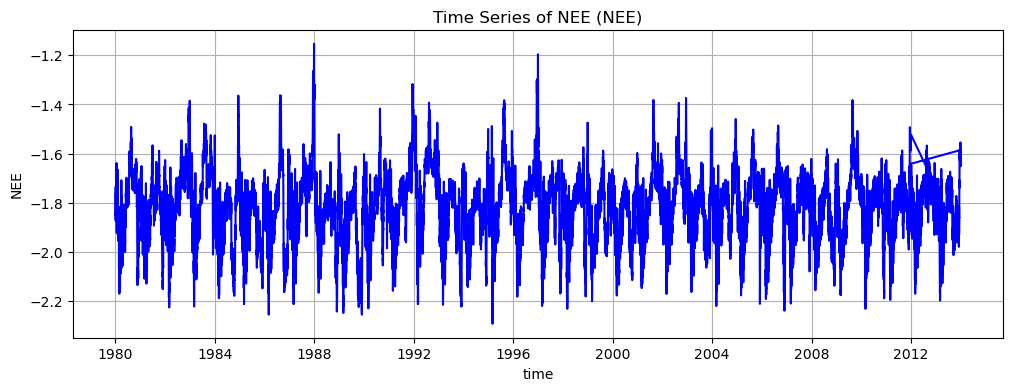


Time coverage:
Start: 1980-01-01T00:00:00.000000000
End:   2013-12-31T00:00:00.000000000
Total time steps: 12419


In [116]:
print("BRSA1 Fluxcom Estimation\n")
return_dataset_analysis(brsa1_fluxcom_data, "NEE")

In [111]:
# FluxCom estimate for Brazilian Amazon
amazon_fluxcom = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/Fluxcom_Data_WFDEI_Brazilian_Amazon_daily_1980-2013.nc')
amazon_fluxcom

<xarray.Dataset> Size: 130MB
Dimensions:  (time: 12419, lat: 43, lon: 61)
Coordinates:
  * time     (time) datetime64[ns] 99kB 1980-01-01 1980-01-02 ... 2012-12-31
  * lon      (lon) float64 488B -73.75 -73.25 -72.75 ... -44.75 -44.25 -43.75
  * lat      (lat) float64 344B 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25
Data variables:
    NEE      (time, lat, lon) float32 130MB ...
Attributes:
    title:                NEE based on FLUXCOM RS+METEO with CRUNCEPv6 climate 
    version:              v1
    forcing:              CRUNCEPv6
    method:               Random Forest
    flux:                 NEE
    temporal_resolution:  daily
    reference:            Jung et al. 2016, Nature; Tramontana et al. 2016, B...
    institution:          MPI-BGC-BGI
    provided_by:          Martin Jung [mjung@bgc-jena.mpg.de] on behalf of FL...
    created_by:           Fabian Gans [fgans@bgc-jena.mpg.de], Ulrich Weber [...

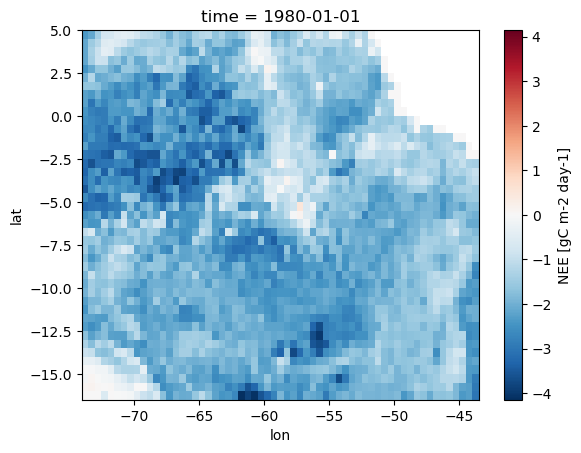

In [112]:
amazon_fluxcom['NEE'].sel(time=amazon_fluxcom['time'].values[0]).plot()

# METEORS AMAZON

Meteorological predictors from the ERA5 reanalysis model and remote sensing data from the CERES and MODIS products.

In [113]:
meteors_k67 = xr.open_dataset('/home/alinenascimento/Downloads/NEE_Dataset/data/meteors_metadata_timeseries_20020101_20111231.nc', decode_times=False)
meteors_k67

<xarray.Dataset> Size: 1MB
Dimensions:                     (time: 3652, bound: 2)
Coordinates:
  * time                        (time) object 29kB '2002-01-01' ... '2011-12-31'
    longitude                   float32 4B ...
    latitude                    float32 4B ...
Dimensions without coordinates: bound
Data variables: (12/79)
    stl1_mean                   (time) float32 15kB ...
    DetailedQA                  (time) float64 29kB ...
    EVI                         (time) float64 29kB ...
    NDVI                        (time) float64 29kB ...
    SummaryQA                   (time) float64 29kB ...
    sur_refl_b02                (time) float64 29kB ...
    ...                          ...
    VPD_magnus_maximum          (time) float32 15kB ...
    lat                         float64 8B ...
    lon                         float64 8B ...
    time_bounds                 (time, bound) int64 58kB ...
    base_time                   int64 8B ...
    time_offset                 (time) int64 29kB ...
Attributes: (12/25)
    command_line:          JOSS_gen_meteors_netCDF.py -s
    Conventions:           ARM-1.3
    process_version:       vap-1.0
    dod_version:           -9999
    site_id:               N/A
    platform_id:           N/A
    ...                    ...
    grid_type:             Regular
    data_type:             netcdf
    author:                Aline Andrade do Nascimento - alinephysics@gmail.com
    owner:                 -9999
    licence:               -9999
    project:               -9999

In [114]:
# Ensure the time coordinate is in datetime format
meteors_k67 = meteors_k67.assign_coords(time=pd.to_datetime(meteors_k67['time']))

Mean Evaporation ERA5 

<xarray.Dataset> Size: 1MB
Dimensions:                     (time: 3652, bound: 2)
Coordinates:
    longitude                   float32 4B ...
    latitude                    float32 4B ...
  * time                        (time) datetime64[ns] 29kB 2002-01-01 ... 201...
Dimensions without coordinates: bound
Data variables: (12/79)
    stl1_mean                   (time) float32 15kB ...
    DetailedQA                  (time) float64 29kB ...
    EVI                         (time) float64 29kB ...
    NDVI                        (time) float64 29kB ...
    SummaryQA                   (time) float64 29kB ...
    sur_refl_b02                (time) float64 29kB ...
    ...                          ...
    VPD_magnus_maximum          (time) float32 15kB ...
    lat                         float64 8B ...
    lon                         float64 8B ...
    time_bounds                 (time, bound) int64 58kB ...
    base_time                   int64 8B ...
    time_offset

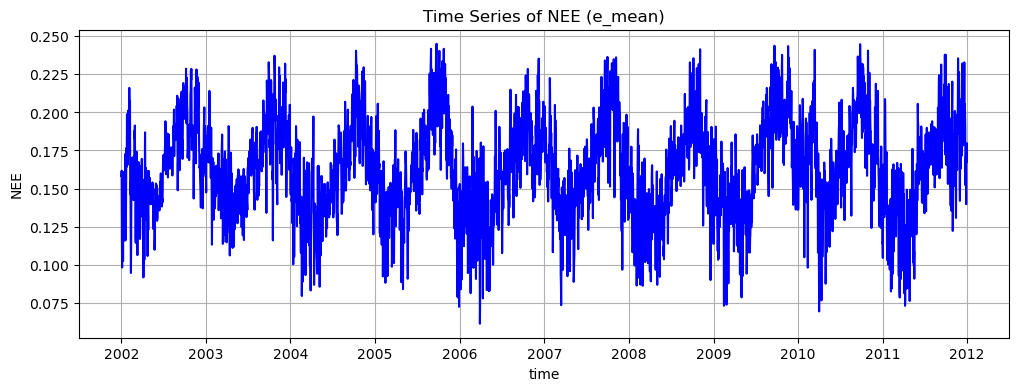


Time coverage:
Start: 2002-01-01T00:00:00.000000000
End:   2011-12-31T00:00:00.000000000
Total time steps: 3652


In [115]:
print("Mean Evaporation ERA5 \n")
return_dataset_analysis(meteors_k67, "e_mean")